<br><br><br>
<center>
<b><font size="+3">CS584: FIFA18 data Analysis </font></b>
<br><br><br><br>
*Ting Jiang*<br>
*Chen Gong*<br>
*Yizhi Hong*
</center>
<br><br><br>

**** <h3>Part 1: data preprocessing</h3> ****


In [1]:
import numpy as np
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
sns.set_style("dark")

**** <h4>look up data firt 10 columns</h4> ****

In [3]:
dataframe = pd.read_csv('../data/fifa-18-demo-player-dataset/CompleteDataset.csv')
dataframe.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [4]:
dataframe.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

**** take the attribute that we need to use ****
<p>The attribute needs to be predicted: 'Overall','Preferred Positions'</p>
<p>The attribute use to predict: rest of the attributes</p>
       

In [5]:
# only consider non goalkeeper's position.

col_needed = ['Overall','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']

# rearrange the attribute first. The attribute need to be predicted: Overall, Preferred Position

recol_needed = ['Overall','Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','Preferred Positions']

dataframe = dataframe[recol_needed]
dataframe.head(10)

,Overall,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,94,63,85,81,91,94,76,88,92,85,...,89,96,92,63,93,95,95,91,95,ST LW
1,93,48,77,89,97,95,90,71,88,74,...,90,95,73,95,95,96,68,87,93,RW
2,92,56,75,81,96,89,84,62,77,81,...,96,88,78,82,95,92,61,90,90,LW
3,92,78,77,86,86,94,84,77,86,85,...,86,93,89,60,91,83,69,77,92,ST
4,92,29,15,14,30,13,11,25,16,47,...,52,85,44,35,48,70,78,61,12,GK
5,91,80,62,77,85,91,84,85,83,81,...,78,91,79,80,89,87,84,83,91,ST
6,90,38,17,21,18,13,19,21,12,40,...,60,88,40,43,42,64,67,58,12,GK
7,90,54,80,82,93,83,79,57,82,86,...,93,85,79,91,92,87,59,87,85,LW
8,90,60,85,85,79,76,84,54,90,73,...,71,86,77,69,89,85,32,52,79,CDM CM
9,90,50,68,74,84,91,62,86,82,70,...,75,88,72,69,85,86,79,80,92,ST


In [6]:
dataframe['Preferred Positions'] = dataframe['Preferred Positions'].str.strip()
#remove Goalkeeper from dataframe

dataframe = dataframe[dataframe['Preferred Positions'] != 'GK']
dataframe.head(10)


,Overall,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,94,63,85,81,91,94,76,88,92,85,...,89,96,92,63,93,95,95,91,95,ST LW
1,93,48,77,89,97,95,90,71,88,74,...,90,95,73,95,95,96,68,87,93,RW
2,92,56,75,81,96,89,84,62,77,81,...,96,88,78,82,95,92,61,90,90,LW
3,92,78,77,86,86,94,84,77,86,85,...,86,93,89,60,91,83,69,77,92,ST
5,91,80,62,77,85,91,84,85,83,81,...,78,91,79,80,89,87,84,83,91,ST
7,90,54,80,82,93,83,79,57,82,86,...,93,85,79,91,92,87,59,87,85,LW
8,90,60,85,85,79,76,84,54,90,73,...,71,86,77,69,89,85,32,52,79,CDM CM
9,90,50,68,74,84,91,62,86,82,70,...,75,88,72,69,85,86,79,80,92,ST
10,90,84,66,73,61,60,67,91,55,68,...,79,85,84,60,84,80,93,77,52,CB
11,89,68,90,83,85,83,83,53,86,77,...,80,88,87,75,87,84,65,75,84,RM CM CAM


**** Check the data  ****

In [7]:
# make sure no null value.
dataframe.isnull().values.any()

False

In [8]:
# Check all the positions we have.
positions = dataframe['Preferred Positions'].str.split().apply(lambda x: x[0]).unique()
positions

array(['ST', 'RW', 'LW', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB',
       'CF', 'RWB', 'LWB'], dtype=object)

In [9]:
# Set the baseline of the prediction
baseline = 1/len(positions)
print('The baseline is', baseline)

The baseline is 0.07142857142857142


In [10]:
# ramdom the new test data.
df_fifa = dataframe.copy()
df_fifa.drop(df_fifa.index, inplace=True)

for position in positions:
    temp = dataframe[dataframe['Preferred Positions'].str.contains(position)]
    temp['Preferred Positions'] = position
    df_fifa = df_fifa.append(temp, ignore_index=True)
    
df_fifa.iloc[::500, :]
            

,Overall,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,94,63,85,81,91,94,76,88,92,85,...,89,96,92,63,93,95,95,91,95,ST
500,73,69,44,55,66,80-3,54,65,75,75,...,68-2,67,86-3,64+4,68,63,69,75-3,70+3,ST
1000,70,70,62,59,67,68,43,71,63,67,...,68,68,74,70,69,67,72,63,75,ST
1500,67,46,55,41,69,67,41,59,62,61,...,67,68,47,71,71,64,73,67,64,ST
2000,64,32,59,47,67,53,42,40,42,51,...,81,58,66,79,65,44,60,84,61,ST
2500,61,64,62,48,66,61,31,55,52,49,...,70,45,74,66,60,48,68,69,58,ST
3000,56,42,31,36,48,61,27,59,49,53,...,58,53,55,56,52,49,78,56,49,ST
3500,71,66,65,66,75,66,55,59,69,53,...,73,68,79,62,74,65,75,91,68,RW
4000,62,41,59,38,61,57,36,58,52,57,...,70,65,72,69,58,49,54,77,60,RW
4500,71,76,73,57,72,42,59,60,41,35,...,82,65,71,83,72,64,70,79,57,LW


In [11]:
cols = [col for col in df_fifa.columns if col not in ['Preferred Positions']]

for i in cols:
    df_fifa[i] = df_fifa[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

df_fifa.iloc[::500, :]

,Overall,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,94,63,85,81,91,94,76,88,92,85,...,89,96,92,63,93,95,95,91,95,ST
500,73,69,44,55,66,77,54,65,75,75,...,66,67,83,68,68,63,69,72,73,ST
1000,70,70,62,59,67,68,43,71,63,67,...,68,68,74,70,69,67,72,63,75,ST
1500,67,46,55,41,69,67,41,59,62,61,...,67,68,47,71,71,64,73,67,64,ST
2000,64,32,59,47,67,53,42,40,42,51,...,81,58,66,79,65,44,60,84,61,ST
2500,61,64,62,48,66,61,31,55,52,49,...,70,45,74,66,60,48,68,69,58,ST
3000,56,42,31,36,48,61,27,59,49,53,...,58,53,55,56,52,49,78,56,49,ST
3500,71,66,65,66,75,66,55,59,69,53,...,73,68,79,62,74,65,75,91,68,RW
4000,62,41,59,38,61,57,36,58,52,57,...,70,65,72,69,58,49,54,77,60,RW
4500,71,76,73,57,72,42,59,60,41,35,...,82,65,71,83,72,64,70,79,57,LW


In [12]:
fig, ax = plt.subplots()
df_fifa_ST = df_fifa[df_fifa['Preferred Positions'] == 'ST'].iloc[::200,:-1]
df_fifa_ST.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')

In [13]:
df_new_ST_normalized = df_fifa_ST.div(df_fifa_ST.sum(axis=1), axis=0)

fig, ax = plt.subplots()
df_new_ST_normalized.T.plot.line(color = 'black', figsize = (15,10), ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 0.07, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 0.07, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 0.07, 'Mixed Attributes', color = 'green', weight = 'bold') 

In [14]:
df_new_normalized = df_fifa.iloc[:,:-1].div(df_fifa.iloc[:,:-1].sum(axis=1), axis=0)
mapping = {'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1, 'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}
df_new_normalized['Preferred Positions'] = df_fifa['Preferred Positions']
df_new_normalized = df_new_normalized.replace({'Preferred Positions': mapping})

df_new_normalized.iloc[::1000,]

,Overall,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,0.039847,0.026706,0.036032,0.034337,0.038576,0.039847,0.032217,0.037304,0.039000,0.036032,...,0.037728,0.040695,0.039000,0.026706,0.039423,0.040271,0.040271,0.038576,0.040271,1
1000,0.037797,0.037797,0.033477,0.031857,0.036177,0.036717,0.023218,0.038337,0.034017,0.036177,...,0.036717,0.036717,0.039957,0.037797,0.037257,0.036177,0.038877,0.034017,0.040497,1
2000,0.040842,0.020421,0.037652,0.029994,0.042757,0.033823,0.026803,0.025526,0.026803,0.032546,...,0.051691,0.037013,0.042119,0.050415,0.041481,0.028079,0.038290,0.053606,0.038928,1
3000,0.039773,0.029830,0.022017,0.025568,0.034091,0.043324,0.019176,0.041903,0.034801,0.037642,...,0.041193,0.037642,0.039062,0.039773,0.036932,0.034801,0.055398,0.039773,0.034801,1
4000,0.039241,0.025949,0.037342,0.024051,0.038608,0.036076,0.022785,0.036709,0.032911,0.036076,...,0.044304,0.041139,0.045570,0.043671,0.036709,0.031013,0.034177,0.048734,0.037975,1
5000,0.038293,0.021343,0.029504,0.036409,0.037665,0.028876,0.034526,0.034526,0.033898,0.039548,...,0.046453,0.036409,0.048336,0.038920,0.037037,0.036409,0.032015,0.049592,0.045198,1
6000,0.036960,0.035398,0.030193,0.029672,0.034357,0.028110,0.030193,0.024987,0.033316,0.035919,...,0.035398,0.037480,0.035919,0.038001,0.036439,0.040083,0.038001,0.021864,0.031234,0
7000,0.036171,0.033945,0.036728,0.031163,0.035058,0.033389,0.019477,0.032832,0.030607,0.036171,...,0.033945,0.033389,0.036171,0.032276,0.037284,0.031720,0.036728,0.036728,0.036728,0
8000,0.038825,0.038328,0.026381,0.023892,0.031857,0.032354,0.022897,0.034345,0.031857,0.024888,...,0.025884,0.035839,0.040319,0.028372,0.037830,0.033350,0.036834,0.030861,0.029368,0
9000,0.042735,0.044567,0.034799,0.017094,0.035409,0.013431,0.025641,0.041514,0.026862,0.037851,...,0.023810,0.041514,0.023199,0.026252,0.036020,0.037241,0.034799,0.020147,0.026862,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_new_normalized.iloc[:,:-1], df_new_normalized.iloc[:,-1], random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))

X train shape: (20438, 30)
X test shape: (6813, 30)
y train shape: (20438,)
y test shape: (6813,)


In [16]:
clf_d = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
acc_d = clf_d.score(X_test, y_test)
print ('Dummy Classifier (most frequent class): {}'.format(acc_d))

clf = LogisticRegression().fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print ('Logistic Regression Accuracy: {}'.format(acc))

Dummy Classifier (most frequent class): 0.6054601497137825
Logistic Regression Accuracy: 0.8590929106120652


In [17]:
Coef_list = list(sorted(zip(X_train.columns, abs(clf.coef_[0])),key=lambda x: -x[1]))
Coef_table = pd.DataFrame(np.array(Coef_list).reshape(-1,2), columns = ['Attributes', 'Coef'])

print (Coef_table)

            Attributes            Coef
0              Marking   21.9724903751
1       Sliding tackle   20.7993462642
2      Standing tackle   20.3171803115
3        Interceptions   18.9463465278
4            Finishing   15.7450530055
5          Positioning   11.2008324033
6              Volleys   10.6199843535
7           Long shots    9.8360547577
8           Aggression   9.02229793691
9               Vision    8.7092272185
10           Dribbling   7.96808349205
11           Penalties    7.6413079128
12            Strength   7.13990005499
13    Heading accuracy   5.91816937623
14          Shot power   5.87450052996
15               Curve   5.86283821997
16             Agility   5.75176226119
17  Free kick accuracy   5.49452789913
18             Jumping   4.89695773577
19        Ball control   4.71685096829
20             Balance   4.50508334278
21        Acceleration    3.7466648946
22             Stamina   2.98931892307
23        Sprint speed   2.78419075695
24       Short passing   

In [18]:
target_cols = Coef_table[:10]['Attributes'].tolist()

clf_2 = LogisticRegression().fit(X_train[target_cols], y_train)
acc_2 = clf_2.score(X_test[target_cols], y_test)
print ('Logistic Regression Accuracy (10 features): {}'.format(acc_2))

Logistic Regression Accuracy (10 features): 0.8601203581388522


In [19]:
f, ax = plt.subplots(figsize=(20, 20))

plt.title('Pearson Correlation of Player attributes')

sns.heatmap(df_fifa.corr(),linewidths=0.25,vmax=1.0, square=True, cmap = 'PuBu', linecolor='black', annot=True)

[(0, 38.936274222273681), (1, 65.95505433799643), (2, 73.523214930707198), (3, 78.405561042067632), (4, 80.593700248416894), (5, 82.524618447994555), (6, 84.209427917312496), (7, 85.848553535251128), (8, 87.248405374231865), (9, 88.504929133645618), (10, 89.674059853123055), (11, 90.651169626621453), (12, 91.558333807522928), (13, 92.408534043025298), (14, 93.205183038834107), (15, 93.960182593333471), (16, 94.668104620148185), (17, 95.351082363070162), (18, 95.972028817824025), (19, 96.554440199996421), (20, 97.102449005122537), (21, 97.624805661568644), (22, 98.115937640443903), (23, 98.539895702992055), (24, 98.929258819650727), (25, 99.21327693367985), (26, 99.482864590449438), (27, 99.716683651962455), (28, 99.89858533403283)]


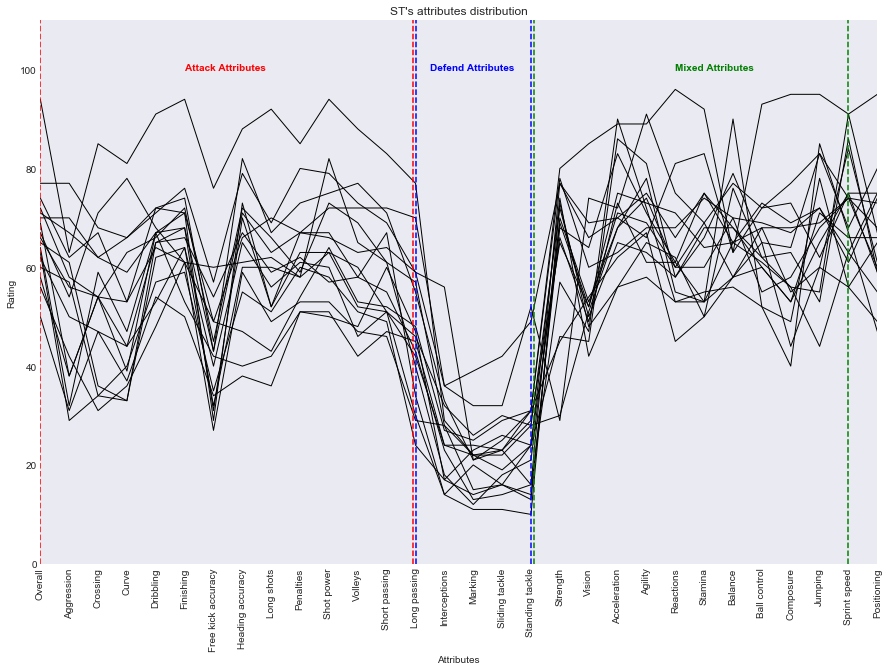

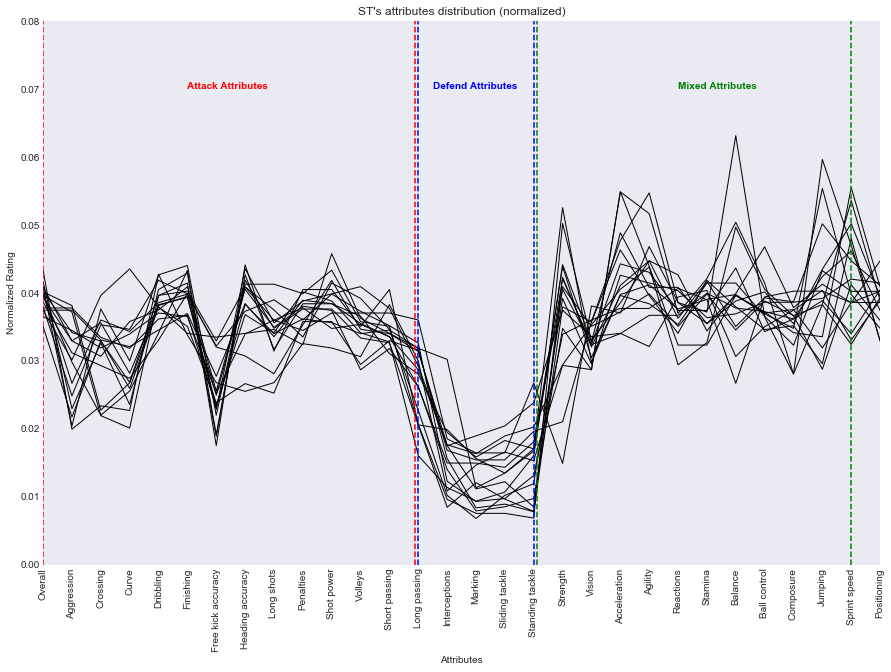

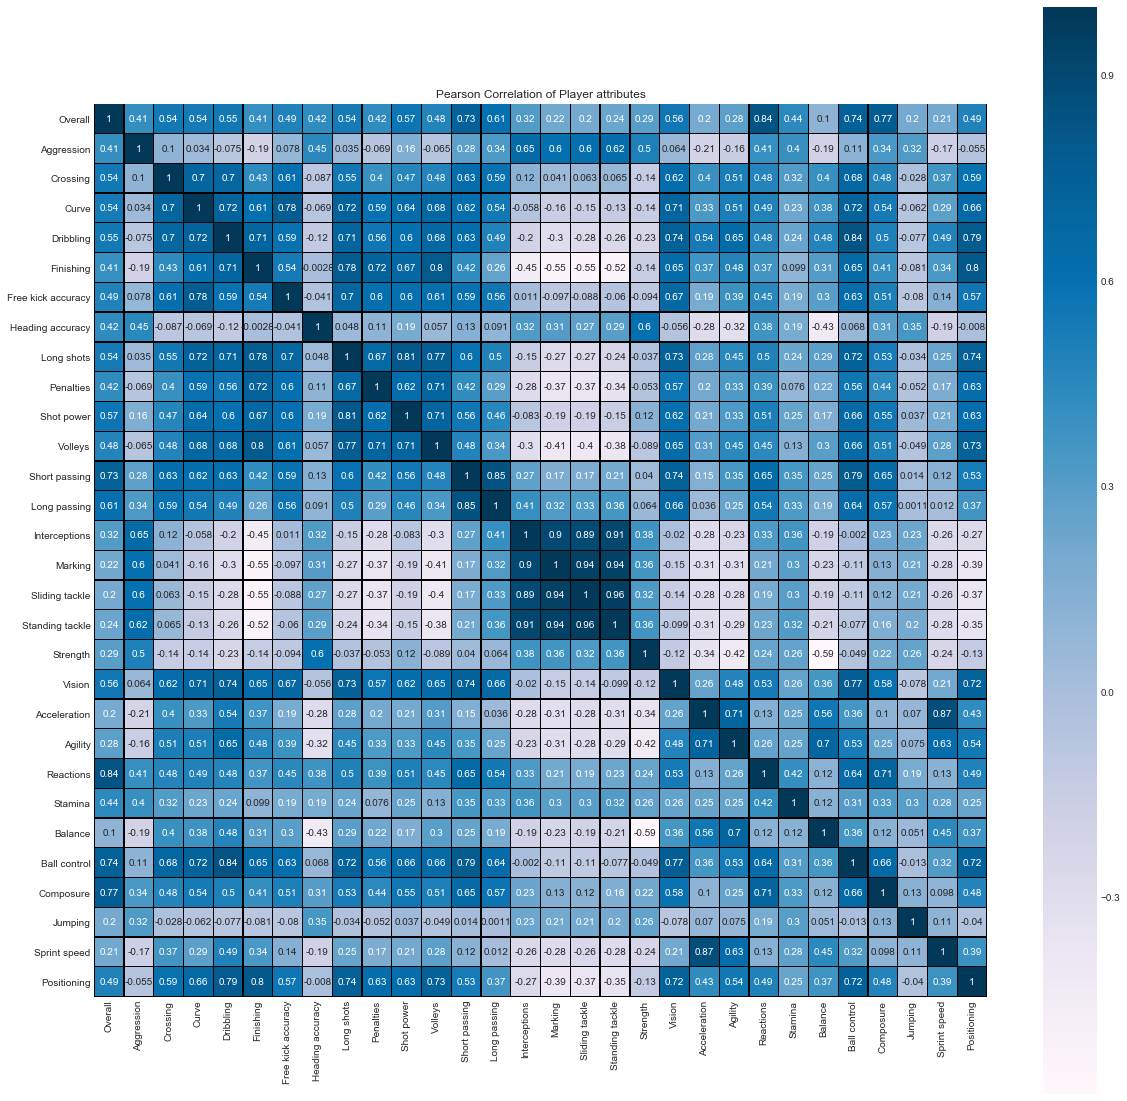

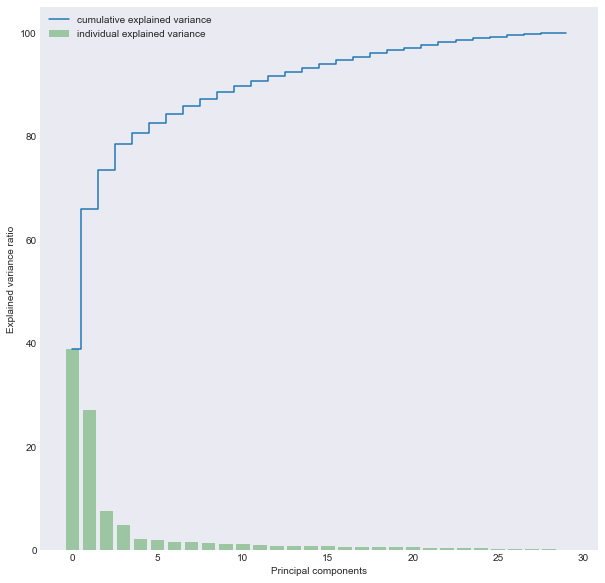

In [20]:
cov_mat = np.cov(df_fifa.iloc[:,:-1].T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

print(list(zip(range(29),cum_var_exp)))

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 10))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [21]:
pca = PCA(n_components=17)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_fifa.iloc[:,:-1], df_fifa.iloc[:,-1], random_state=0)

X_train_2_pca = pca.fit_transform(X_train_2)
X_train_2_pca = pd.DataFrame(X_train_2_pca)

x_test_2_pca = pca.transform(X_test_2)

clf_17d = LogisticRegression().fit(X_train_2_pca, y_train_2)
acc_17d = clf_17d.score(x_test_2_pca, y_test_2)
print ('Logistic Regression Accuracy with PCA (17 components): {}'.format(acc_17d))

Logistic Regression Accuracy with PCA (17 components): 0.44136210186408337


In [22]:
lda = LDA(n_components=None)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_fifa.iloc[:,:-1], df_fifa.iloc[:,-1], random_state=0)

X_lda = lda.fit(X_train_3, y_train_3)

lda_var_ratios = lda.explained_variance_ratio_

# get number of components needed to explain 95% variance
def select_n_components(var_ratio, goal_var: float) -> int:
    
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break

    return n_components

print('Number of components needed to explain 95% variance: {}'.format(select_n_components(lda_var_ratios, 0.95)))

Number of components needed to explain 95% variance: 4


In [23]:
lda_n = LDA(n_components=3)
X_train_3_lda = lda_n.fit_transform(X_train_3, y_train_3)
X_train_3_lda = pd.DataFrame(X_train_3_lda)

X_test_3_lda = lda_n.transform(X_test_3)

clf_3d = LogisticRegression().fit(X_train_3_lda, y_train_3)
acc_3d = clf_3d.score(X_test_3_lda, y_test_3)
print ('Logistic Regression Accuracy with LDA (3 components): {}'.format(acc_3d))

Logistic Regression Accuracy with LDA (3 components): 0.4381329810656099


In [24]:
df_new_normalized_all = df_fifa.copy()
mapping_all = {'ST': 0, 'RW': 1, 'LW': 2, 'RM': 3, 'CM': 4, 'LM': 5, 'CAM': 6, 'CF': 7, 'CDM': 8, 'CB': 9, 'LB': 10, 'RB': 11, 'RWB': 12, 'LWB': 13}

df_new_normalized_all = df_new_normalized_all.replace({'Preferred Positions': mapping_all})
df_new_normalized_all.iloc[::1000,]

,Overall,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,94,63,85,81,91,94,76,88,92,85,...,89,96,92,63,93,95,95,91,95,0
1000,70,70,62,59,67,68,43,71,63,67,...,68,68,74,70,69,67,72,63,75,0
2000,64,32,59,47,67,53,42,40,42,51,...,81,58,66,79,65,44,60,84,61,0
3000,56,42,31,36,48,61,27,59,49,53,...,58,53,55,56,52,49,78,56,49,0
4000,62,41,59,38,61,57,36,58,52,57,...,70,65,72,69,58,49,54,77,60,1
5000,61,34,47,58,60,46,55,55,54,63,...,74,58,77,62,59,58,51,79,72,2
6000,71,68,58,57,66,54,58,48,64,69,...,68,72,69,73,70,77,73,42,60,8
7000,65,61,66,56,63,60,35,59,55,65,...,61,60,65,58,67,57,66,66,66,8
8000,78,77,53,48,64,65,46,69,64,50,...,52,72,81,57,76,67,74,62,59,9
9000,70,73,57,28,58,22,42,68,44,62,...,39,68,38,43,59,61,57,33,44,9


In [25]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_new_normalized_all.iloc[:,:-1], df_new_normalized_all.iloc[:,-1], random_state=0)

print('X train shape: {}'.format(X_train_all.shape))
print('X test shape: {}'.format(X_test_all.shape))
print('y train shape: {}'.format(y_train_all.shape))
print('y test shape: {}'.format(y_test_all.shape))

X train shape: (20438, 30)
X test shape: (6813, 30)
y train shape: (20438,)
y test shape: (6813,)


In [ ]:
clf_d_all = DummyClassifier(strategy = 'most_frequent').fit(X_train_all, y_train_all)
acc_d_all = clf_d_all.score(X_test_all, y_test_all)
print ('Dummy Classifier (most frequent class): {}'.format(acc_d_all))

clf_all = LogisticRegression().fit(X_train_all, y_train_all)
acc_all = clf_all.score(X_test_all, y_test_all)
print ('Logistic Regression Accuracy: {}'.format(acc_all))

Dummy Classifier (most frequent class): 0.1271099368853662
Logistic Regression Accuracy: 0.4532511375311904


In [ ]:
clf_all_for = RandomForestClassifier(random_state=0).fit(X_train_all, y_train_all)
acc_all_for = clf_all_for.score(X_test_all, y_test_all)
print ('Random Forest Accuracy (Default parameters): {}'.format(acc_all_for))

In [ ]:
parameters_f = [{'max_depth': range(2,10), 'n_estimators': range(2,8,2), 'max_features': range(10,20)}]
clf_all_for_g = GridSearchCV(RandomForestClassifier(random_state=0), parameters_f)
clf_all_for_g.fit(X_train_all, y_train_all)

print('Best score for train data:', clf_all_for_g.best_score_)
print('Best depth:',clf_all_for_g.best_estimator_.max_depth)
print('Best n trees:',clf_all_for_g.best_estimator_.n_estimators)
print('Best n features:',clf_all_for_g.best_estimator_.max_features)
print('Score for test data:',clf_all_for_g.score(X_test_all, y_test_all))

In [ ]:
clf_all_nn = MLPClassifier(random_state=0).fit(X_train_all, y_train_all)
acc_all_nn = clf_all_nn.score(X_test_all, y_test_all)
print ('Neural Networks Accuracy (Default parameters): {}'.format(acc_all_nn))

parameters_n = [{'alpha': [0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes':[(10,),(20,),(100,)]}]
clf_all_nn_g = GridSearchCV(MLPClassifier(random_state=0), parameters_n)
clf_all_nn_g.fit(X_train_all, y_train_all)

print('Best score for train data:', clf_all_nn_g.best_score_)
print('Best alpha:',clf_all_nn_g.best_estimator_.alpha)
print('Best hidden_layer_sizes:',clf_all_nn_g.best_estimator_.hidden_layer_sizes)
print('Score for test data:',clf_all_nn_g.score(X_test_all, y_test_all))